<a href="https://colab.research.google.com/github/dimasbaguss/Belajar_remote_git/blob/main/uts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

Menampung file csv dalam variable dataset

In [3]:
dataset = pd.read_csv('tes_knn.csv')

In [4]:
dataset.head()

,stasiun,latitude,longtitude,IDWMO,kabupaten,terdeteksi_kebakaran
0,stasiun meteorologi paloh,1.740,109.30,96535,sambas,0
1,stasiun meteorologi nangapinoh,-0.420,111.47,96557,melawi,1
2,stasiun meteorologi susilo,0.060,111.47,96559,sintang,1
3,stasiun meteorologi pangsuma,0.840,112.93,96565,kapuas hulu,0
4,stasiun meteorologi supadio,-14.206,109.45,96581,kubu raya,0


Ambil lokasi yg digunakan dengan dataset.iloc

In [5]:
x = dataset.iloc[:,[1,2]].values
y = dataset.iloc[:, -1].values

In [6]:
print(y)

[0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0
 1 1 0]


Bagi data training dan data tes (25% untuk testing)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [8]:
print(x_test)

[[ -1.9   100.77 ]
 [ -0.116 100.33 ]
 [ -2.12   99.8  ]
 [-14.206 109.45 ]
 [ -2.12   97.8  ]
 [ -2.12   99.8  ]
 [ -1.987 100.91 ]
 [  1.68   66.89 ]
 [ -0.116 100.1  ]
 [ -0.116 108.99 ]]


Hitung data x_train dan x_test

In [9]:
len(x_train)

30

In [10]:
len(x_test)

10

Hitung data y_train dan y_test

In [11]:
len(y_train)

30

In [12]:
len(y_test)

10

Lakukan scalling dengan StandardScaler

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [14]:
print(x_train)

[[ 1.42008255 -2.02181379]
 [-2.06265654 -0.86474955]
 [-0.58939339  0.17462312]
 [ 0.56341122  1.13884332]
 [ 1.42008255 -2.03528452]
 [-0.52011936  0.38731875]
 [-2.06265654 -1.02214432]
 [ 0.47034076  0.41071527]
 [-2.06265654 -1.03561504]
 [ 0.47034076  0.33981672]
 [ 0.47034076  0.16966022]
 [ 0.57134337  0.97719464]
 [ 1.60040657 -2.0700248 ]
 [-0.51906174  0.3894457 ]
 [ 0.47034076 -0.92855824]
 [-0.42017437  1.0324955 ]
 [-0.58939339  0.12783008]
 [ 0.30958268  1.13884332]
 [-0.51906174  0.326346  ]
 [ 0.47034076  0.34974252]
 [ 1.42008255 -2.0310306 ]
 [-0.58939339  0.11365037]
 [ 0.51581837  0.98782942]
 [-0.58939339  0.17675007]
 [-0.51906174  0.38235585]
 [-0.51906174  0.375266  ]
 [-0.51906174  0.38731875]
 [-0.51906174  0.39582657]
 [ 0.9758826   1.24235519]
 [ 1.45181111  0.98499348]]


Panggil function KNN untuk dilakukan klasifikasi

In [15]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

Tentukan prediksi

In [16]:
y_predict = classifier.predict(x_test)

Hitung evaluasi dengan confusion_matrix

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[3 1]
 [5 1]]


Melihat visual persebaran data (training)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


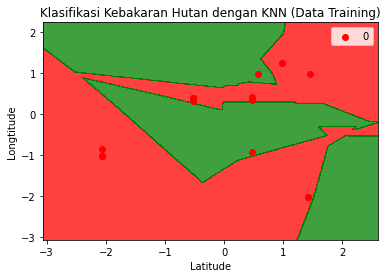

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


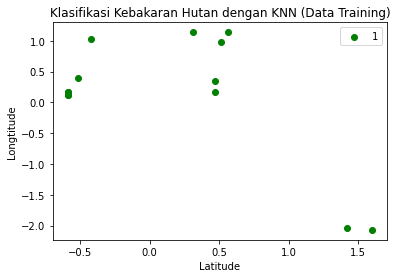

In [18]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train

# Membuat kotak gambar
# x1 untuk menampilkan latitude, dimulai dari kolom pertama x_train
# x2 untuk menampilkan longtitude, dimulai dari kolom kedua x_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max()+1, step = 0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 1].max()+1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

# range dari max ke min
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  # scatter untuk membuat titik
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
  plt.title('Klasifikasi Kebakaran Hutan dengan KNN (Data Training)')
  plt.xlabel('Latitude')
  plt.ylabel('Longtitude')
  plt.legend()
  # menampilkan gambar
  plt.show()

Melihat visualisasi persebaran data testing

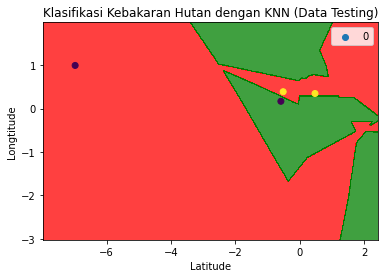

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


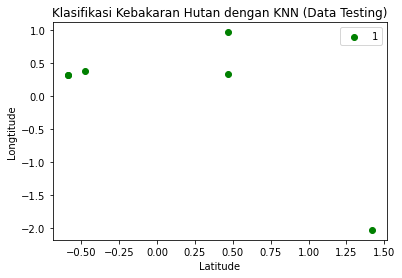

In [19]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max()+1, step = 0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 1].max()+1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
  plt.title('Klasifikasi Kebakaran Hutan dengan KNN (Data Testing)')
  plt.xlabel('Latitude')
  plt.ylabel('Longtitude')
  plt.legend()
  plt.show()